In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

## AR Models

X(t) = phi * X(t-1) + epsilon  

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess

In [ ]:
ArmaProcess?

In [7]:
ar1 = ArmaProcess(ar=(1, -.9, 0.7, -0.42))

In [8]:
ar1_data = ar1.generate_sample(nsample=1000)

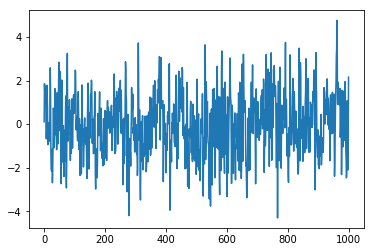

In [9]:
plt.plot(ar1_data)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(ar1_data)

(-12.49767657213892,
 2.852160075783386e-23,
 2,
 997,
 {'1%': -3.4369259442540416,
  '5%': -2.8644432969122833,
  '10%': -2.5683158550174094},
 2809.6223284395383)

In [12]:
from statsmodels.tsa.arima_model import ARMA

In [13]:
ar_model = ARMA(ar1_data, order=(3,0))

In [14]:
res = ar_model.fit()

In [15]:
res.params

array([-0.04657063,  0.885076  , -0.6557694 ,  0.367447  ])

In [16]:
res.k_ar

3

In [17]:
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(3, 0)   Log Likelihood               -1431.102
Method:                       css-mle   S.D. of innovations              1.012
Date:                Mon, 05 Aug 2019   AIC                           2872.204
Time:                        23:34:40   BIC                           2896.743
Sample:                             0   HQIC                          2881.531
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0466      0.079     -0.588      0.557      -0.202       0.109
ar.L1.y        0.8851      0.029     30.044      0.000       0.827       0.943
ar.L2.y       -0.6558      0.035    -18.734      0.0

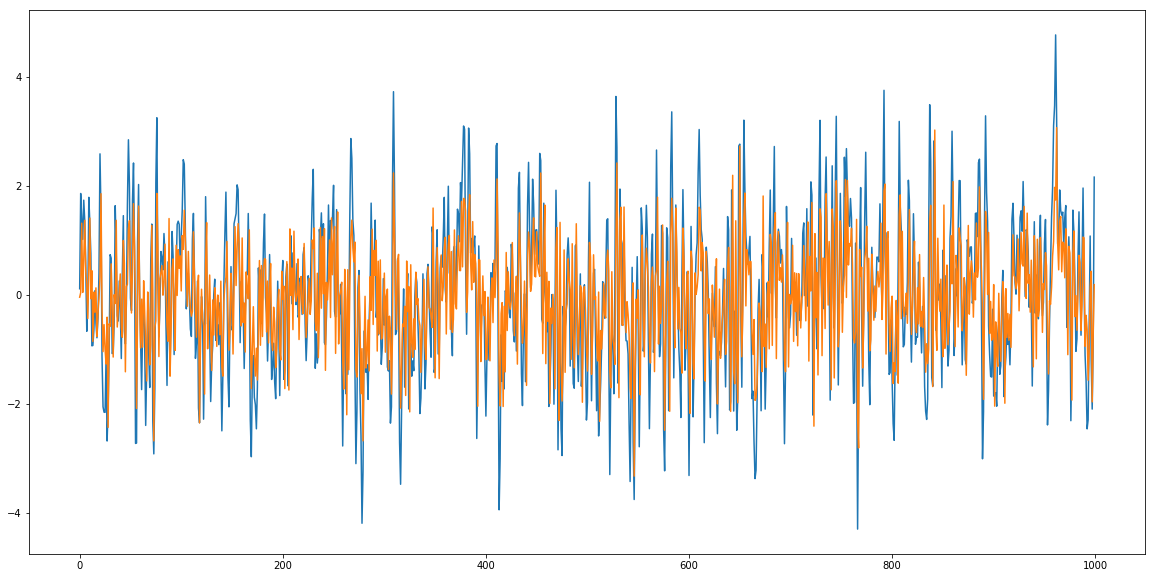

In [42]:
plt.plot(ar1_data)
plt.plot(res.fittedvalues)
plt.show()

In [43]:
r = res.predict(start=3, end=1003)

In [44]:
r

array([ 0.04105085,  0.64407793,  1.3656371 , ..., -0.26581415,
       -0.55351122,  0.27772435])

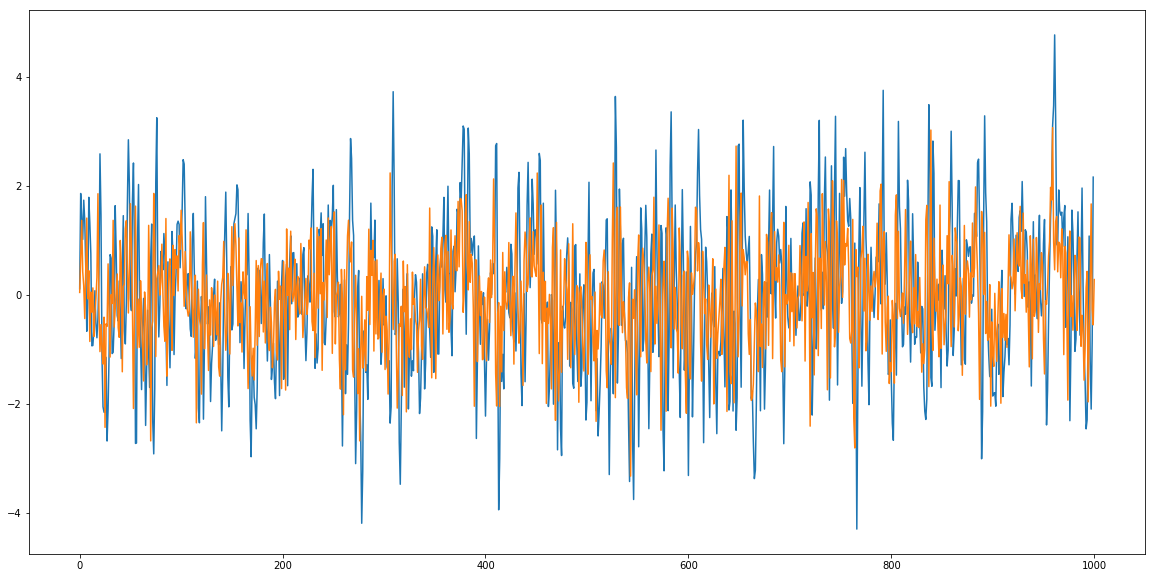

In [45]:
# plt.plot(ar1_data)
plt.plot(ar1_data)
plt.plot(r)
plt.show()

## MA Models

X(T) = MEAN + E + theta1 * E(t-1)

In [46]:
ma1 = ArmaProcess(ma=(1, 0.9))

In [47]:
ma1_data = ma1.generate_sample(nsample=1000)

In [48]:
ma1_model = ARMA(ma1_data, order=(0,1))

In [49]:
res = ma1_model.fit()

In [50]:
res.params

array([0.02259327, 0.89657806])

In [51]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.250
Method:                       css-mle   S.D. of innovations              0.986
Date:                Mon, 05 Aug 2019   AIC                           2816.499
Time:                        23:38:29   BIC                           2831.223
Sample:                             0   HQIC                          2822.095
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.059      0.382      0.702      -0.093       0.138
ma.L1.y        0.8966      0.014     64.488      0.000       0.869       0.924
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1154           +0.0000j            1.1154            0.5000
-----------------------------------------------------------------------------
"""

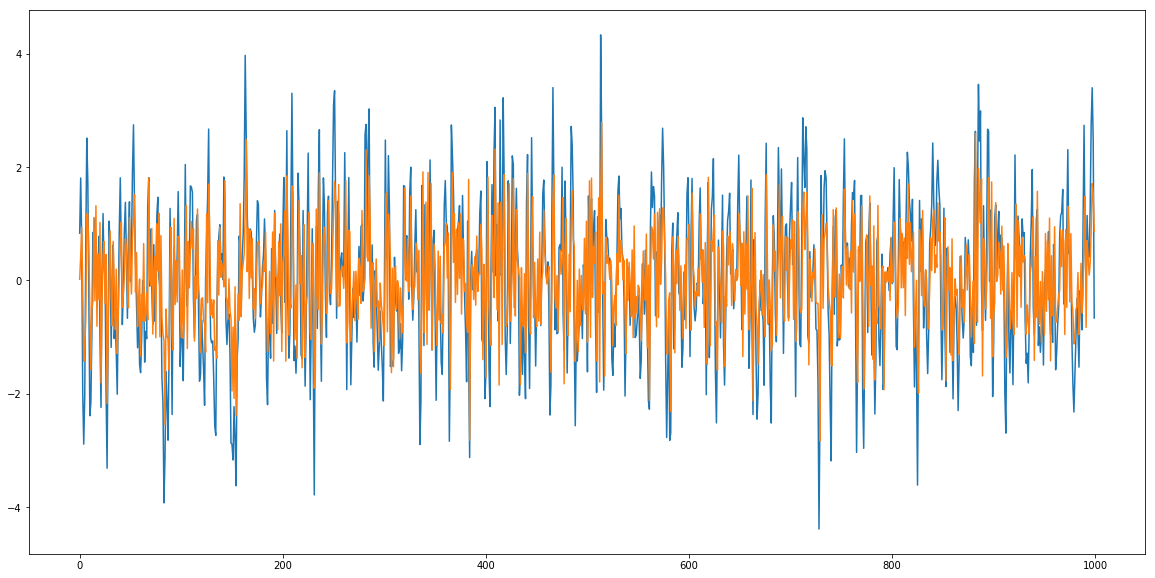

In [52]:
plt.plot(ma1_data)
plt.plot(res.fittedvalues)

## ARMA Models

In [53]:
alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
ar_ma = ArmaProcess(ar=ar, ma=ma)

In [54]:
ar_ma_data = ar_ma.generate_sample(nsample=5000)

In [55]:
arma_model = ARMA(ar_ma_data, order=(2,2))

In [56]:
res = arma_model.fit()

In [57]:
res.params

array([-0.03284668,  0.48416684, -0.25696799,  0.52122451, -0.28228343])

In [58]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(2, 2)   Log Likelihood               -7054.004
Method:                       css-mle   S.D. of innovations              0.992
Date:                Mon, 05 Aug 2019   AIC                          14120.007
Time:                        23:38:53   BIC                          14159.110
Sample:                             0   HQIC                         14133.712
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0328      0.022     -1.461      0.144      -0.077       0.011
ar.L1.y        0.4842      0.054      8.958      0.000       0.378       0.590
ar.L2.y       -0.2570      0.015    -17.077      0.000      -0.286      -0.227
ma.L1.y        0.5212      0.055      9.425      0.000       0.413       0.630
ma.L2.y       -0.2823      0.051     -5.556      0.000      -0.382      -0.183
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9421           -1.7332j            1.9727           -0.1708
AR.2            0.9421           +1.7332j            1.9727            0.1708
MA.1           -1.1732           +0.0000j            1.1732            0.5000
MA.2            3.0196           +0.0000j            3.0196            0.0000
-----------------------------------------------------------------------------
"""

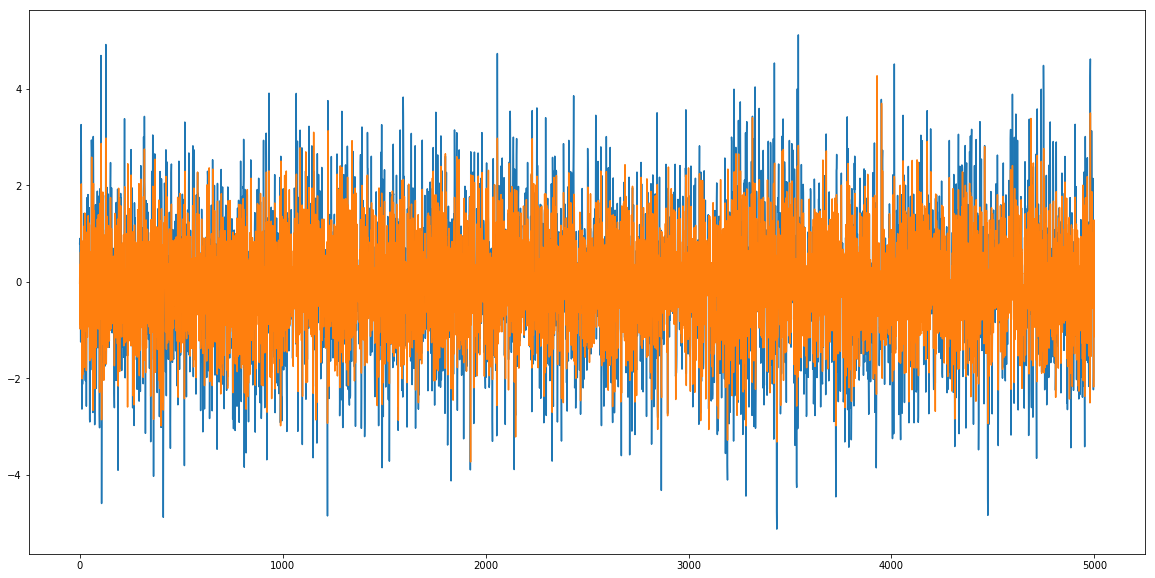

In [59]:
plt.plot(ar_ma_data)
plt.plot(res.fittedvalues)

In [60]:
res.k_ar

2

In [61]:
res.k_ma

2

In [62]:
res.k_trend

1